After several tests we chose to use the pca model of the PYOD API.

This code shows how we have done the training and testing of our model on different scenarios. 

In [68]:
import pandas as pd
import numpy as np
import pyod as py
from pyod.models.pca import PCA
from pretty_confusion_matrix import pp_matrix_from_data
import plotly.express as px
from joblib import dump, load

In [2]:
path = 'C:/Users/cjoly/projet/Net1_CMH/'
time = pd.read_csv(path+'Scenario-1/Timestamps.csv')

In [8]:
model=py.models.pca.PCA()

training on scenario 505 : abrupt & 20% leak

In [78]:
train = pd.read_csv(path+'Scenario-505/df_min.csv', parse_dates=['timestamp'], index_col='timestamp')
y = pd.read_csv(path+'Scenario-505/y.csv', parse_dates=['timestamp'], index_col='timestamp')

In [79]:
y.describe()

Unnamed: 0         Index         Label
count  17520.000000  17520.000000  17520.000000
mean    8759.500000   8760.500000      0.221062
std     5057.732694   5057.732694      0.414974
min        0.000000      1.000000      0.000000
25%     4379.750000   4380.750000      0.000000
50%     8759.500000   8760.500000      0.000000
75%    13139.250000  13140.250000      0.000000
max    17519.000000  17520.000000      1.000000

In [80]:
y_train = model.fit(train)

In [81]:
y_train = model.predict(train)

In [82]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
y_train=pd.DataFrame(y_train)
y_train

0
0      0
1      0
2      0
3      0
4      0
...   ..
17515  0
17516  0
17517  0
17518  0
17519  0

[17520 rows x 1 columns]

In [84]:
y_train.insert(0,"timestamp" , pd.to_datetime(time['Timestamp']))
y_train

timestamp  0
0     2017-01-01 00:00:00  0
1     2017-01-01 00:30:00  0
2     2017-01-01 01:00:00  0
3     2017-01-01 01:30:00  0
4     2017-01-01 02:00:00  0
...                   ... ..
17515 2017-12-31 21:30:00  0
17516 2017-12-31 22:00:00  0
17517 2017-12-31 22:30:00  0
17518 2017-12-31 23:00:00  0
17519 2017-12-31 23:30:00  0

[17520 rows x 2 columns]

In [85]:
#save the prediction
y_train.to_csv(path+'Scenario-505/pred_data.csv')
y_train = pd.read_csv(path+'Scenario-505/pred_data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [86]:
fig = px.scatter(y.reset_index(), x='timestamp', y='Label', title='Anomaly réel')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [88]:
fig = px.scatter(y_train.reset_index(), x='timestamp', y='0', title='Anomaly prédites')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

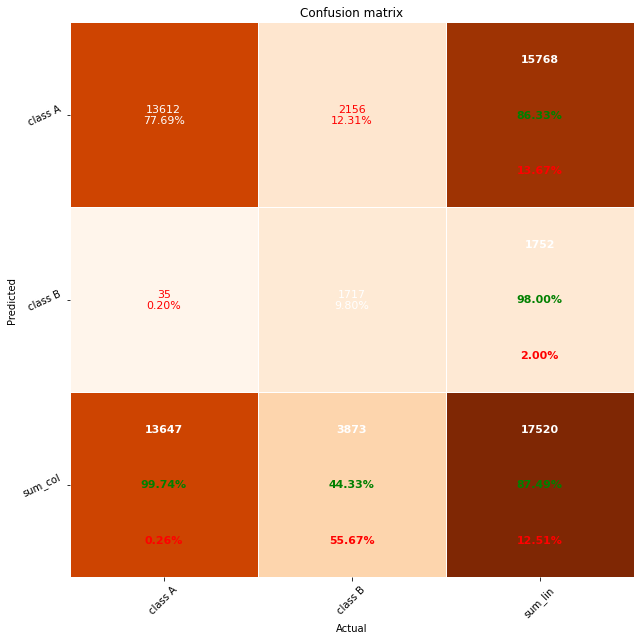

In [90]:
m=pp_matrix_from_data(y['Label'],y_train['0'])
m

In [103]:
# save the model
dump(model, 'pca.joblib')
# load the model
clf = load('pca.joblib')

test on scenario 2 : incipient & 5% leak

In [91]:
x = pd.read_csv(path+'Scenario-2/df_min.csv',parse_dates=['timestamp'], index_col='timestamp')
y = pd.read_csv(path+'Scenario-2/y.csv', parse_dates=['timestamp'], index_col='timestamp')

In [92]:
y.describe()

Unnamed: 0         Label
count  17520.000000  17520.000000
mean    8759.500000      0.051712
std     5057.732694      0.221452
min        0.000000      0.000000
25%     4379.750000      0.000000
50%     8759.500000      0.000000
75%    13139.250000      0.000000
max    17519.000000      1.000000

In [93]:
y_test = model.predict(x)

In [94]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [95]:
y_pred=np.zeros(len(y_test))
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
#to smooth the data we take the mean on the 48 last measures (24h) to avoid most of the noise 

for i in range(48,len(y_test)):
    y_pred[i]= round(np.mean(y_test[i-48:i]))    
y_test=y_pred

In [97]:
y_test=pd.DataFrame(y_test)
y_test

0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
17515  0.0
17516  0.0
17517  0.0
17518  0.0
17519  0.0

[17520 rows x 1 columns]

In [98]:
y_test.insert(0,"timestamp" , pd.to_datetime(time['Timestamp']))
y_test

timestamp    0
0     2017-01-01 00:00:00  0.0
1     2017-01-01 00:30:00  0.0
2     2017-01-01 01:00:00  0.0
3     2017-01-01 01:30:00  0.0
4     2017-01-01 02:00:00  0.0
...                   ...  ...
17515 2017-12-31 21:30:00  0.0
17516 2017-12-31 22:00:00  0.0
17517 2017-12-31 22:30:00  0.0
17518 2017-12-31 23:00:00  0.0
17519 2017-12-31 23:30:00  0.0

[17520 rows x 2 columns]

In [99]:
#save the prediction
y_test.to_csv(path+'Scenario-2/pred_data.csv')
y_test = pd.read_csv(path+'Scenario-2/pred_data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [100]:
fig = px.scatter(y.reset_index(), x='timestamp', y='Label', title='True Anomalies ')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [101]:
fig = px.scatter(y_test.reset_index(), x='timestamp', y=0, title='Predicted anomalies')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

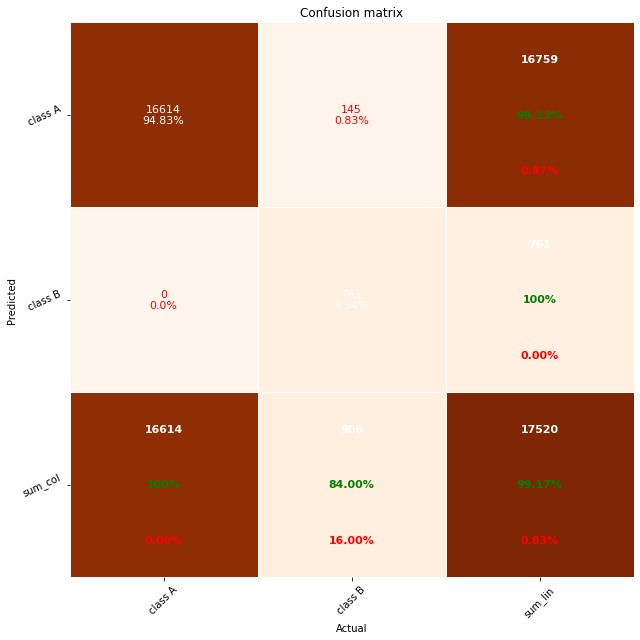

In [102]:
pp_matrix_from_data(y['Label'],y_test[0])